In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Func_theta(x,theta):
    return theta[0]*x[:,0]+theta[1]*x[:,1]

def CostFunction(theta,x,t):
    y=Func_theta(x,theta)
    return np.sum((y-t)**2)

def dCostFunction(theta,x,t):
    batch_size=t.shape[0]
    tmp_mat=np.dot(x,theta)-t  # 大小为97的向量
    tmp_sum=np.dot(tmp_mat,x)/batch_size
    return tmp_sum

def gradient_descent(theta,x,t,alpha,maxIters):
    history_cost=[]
    delta=1e-9
    for iter_idx in range(maxIters):
        theta_before=theta
        theta=theta-alpha*dCostFunction(theta,x,t)
        cost=CostFunction(theta,x,t)
        history_cost.append(cost)
    
    return theta,np.array(history_cost)

In [3]:
def get_data(fileName):
    inData=None
    with open(file=fileName) as f:
        contents=f.read()
        data=[]
        for line in contents.split('\n'):
            t=[]
            for d in line.split(','):
                if len(d)>=1:
                    t.append(float(eval(d)))
                else:
                    break
            if len(t)==2:
                data.append(t)
        inData=data
    return np.array(inData)

In [4]:
datas=get_data('ex1data1.txt')
x=datas[:,0]
ones=np.zeros_like(x)+1
x=np.column_stack([ones,x])

t=datas[:,1]

In [5]:
init_theta=np.zeros(2)
print(init_theta)

[0. 0.]


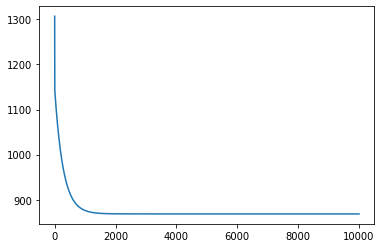

In [6]:
cnt_iter=10000
final_theta,cost=gradient_descent(theta=init_theta,x=x,t=t,alpha=0.01,maxIters=cnt_iter)
plt.plot(np.arange(cnt_iter),cost)

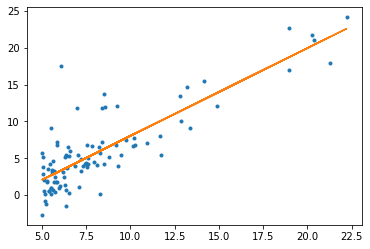

Final theta is :  [-3.89578082  1.19303364]


In [8]:
plt.plot(x[:,1],t,'.')
y=Func_theta(x,final_theta)
plt.plot(x[:,1],y)
plt.show()
print("Final theta is : ",final_theta)

In [26]:
def ShowFunction(theta_0,theta_1):
    x_size=theta_0.shape[0]
    y_size=theta_1.shape[1]
    ret_mat=np.zeros_like(theta_0)
    for i in range(x_size):
        for j in range(y_size):
            ret_mat[i][j]=np.sum((theta_0[i][j]*x[:,0]+theta_1[i][j]*x[:,1]-t)**2)
    return ret_mat

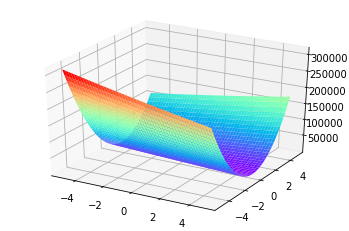

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax1=plt.axes(projection='3d')
theta_0=np.arange(-5.0,5.0,0.01)
theta_1=np.arange(-5.0,5.0,0.01)
X,Y=np.meshgrid(theta_0,theta_1)
Z=ShowFunction(X,Y)

ax1.plot_surface(X,Y,Z,cmap='rainbow')
plt.show()